## Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())
"""
trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()
"""

train.csv shape is  (139753, 9)
test.csv shape is  (17470, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4                       1  1163721600   

                                             Summary  \
0                        An Unexplained Anime Review   
1                                         not great.   
2                    Technical problem with this DVD   
3                          Heeeeyyyyy LAAAAADEEE!!!!   
4  Herzog the Great Trave

'\ntrainingSet[\'Score\'].value_counts().plot(kind=\'bar\', legend=True, alpha=.5)\nplt.title("Count of Scores")\nplt.show()\n\ntrainingSet[\'ProductId\'].value_counts().nlargest(25).plot(kind=\'bar\', legend=True, alpha=.5)\nplt.title("Top 25 most rated Products")\nplt.show()\n\ntrainingSet[\'ProductId\'].value_counts().nsmallest(25).plot(kind=\'bar\', legend=True, alpha=.5)\nplt.title("Top 25 least rated Products")\nplt.show()\n\ntrainingSet[\'UserId\'].value_counts().nlargest(25).plot(kind=\'bar\', legend=True, alpha=.5)\nplt.title("Top 25 Reviewers")\nplt.show()\n\ntrainingSet[\'UserId\'].value_counts().nsmallest(25).plot(kind=\'bar\', legend=True, alpha=.5)\nplt.title("Lowest 25 Reviewers")\nplt.show()\n\ntrainingSet[[\'Score\', \'HelpfulnessNumerator\']].groupby(\'Score\').mean().plot(kind=\'bar\', legend=True, alpha=.5)\nplt.title("Mean Helpfulness Numerator per Score")\nplt.show()\n\ntrainingSet[[\'Score\', \'ProductId\']].groupby(\'ProductId\').mean().nlargest(25, \'Score\').p

## Feature Extraction

In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict 
from imblearn.under_sampling import RandomUnderSampler

import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt 
from collections import Counter

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce
import nltk
from nltk.corpus import stopwords
import statsmodels.api as sm


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import opinion_lexicon

import xgboost as xgb

from sklearn.utils.class_weight import compute_class_weight

from textblob import TextBlob

from afinn import Afinn

from sklearn.linear_model import RidgeClassifier

from scipy.sparse import hstack

from scipy.sparse import csr_matrix

from sklearn.preprocessing import MaxAbsScaler

In [3]:
import pandas as pd

def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)

    return df


def make_balanced(df):
    
    #df=df.dropna(subset=['Summary','Text','Score'], inplace=False)
    
    y_temp = df['Score']

    undersample = RandomUnderSampler(random_state=42)

    df_undersampled, _ = undersample.fit_resample(df, y_temp)
    
    return df_undersampled



def fill_nas(df):
    
    df['Text'].fillna('', inplace=True)
    df['Summary'].fillna('', inplace=True)
    
    return df


def drop_nas(df):
    
    df=df.dropna(subset=['Score'], inplace=False)
    
    return df
    
    

def product_popularity(df):
    
    popularity = defaultdict(lambda: 0)

    for index in range(len(df)):
   
        popularity[df.iloc[index].ProductId] +=  1
    
    
    prod_popularity=[]
    
    
    for index in range(len(df)):
        prod_popularity +=[popularity[df.iloc[index].ProductId]]
    
    df['Product_Popularity']=prod_popularity
    
    return df


def user_popularity(df):
    
    user_popularity = defaultdict(lambda: 0)
    
    for index in range(len(df)):
        user_popularity[df.iloc[index].UserId] +=1
    
    
    user_pop=[]
    
    for index in range(len(df)):
        user_pop +=[user_popularity[df.iloc[index].UserId]]
    
    df['User_Popularity']=user_pop
    
    return df
    



def add_mark_count(df, col_name, mark):
    # count occurrences of 'mark' in 'col_name'
    
    df[f"{mark}_count_{col_name}"] = df[col_name].apply(lambda x: x.count(mark))
    return df



def add_capital_freq(df, col_name):
    # calculate the frequency of uppercase letters in 'col_name'
    
    df[f"capital_freq_{col_name}"] = df[col_name].apply(lambda text: sum(1 for char in re.sub(' ', '',text) if char.isupper()) / len(re.sub(' ', '',text)) if len(text) > 0 else 0)
    return df



def sentiment_analysis1(df, col_name):
    nltk.download('opinion_lexicon')
    
    positive_words = set(opinion_lexicon.positive())
    negative_words = set(opinion_lexicon.negative())
    
    concat_lines = special_remove(df[col_name].tolist())
    
    num_positive_words = []
    num_negative_words = []
    
    for line in concat_lines:
        words = re.split("\s+", line)
        
        num_pos = 0
        num_neg = 0
        
        for i, word in enumerate(words):
            if word in positive_words:
                if i > 0 and words[i - 1] != "not":
                    num_pos += 1
                elif i > 0 and words[i - 1] == "not":
                    num_neg += 1
                else:
                    num_pos += 1
            
            if word in negative_words:
                if i > 0 and words[i - 1] != "not":
                    num_neg += 1
                elif i > 0 and words[i - 1] == "not":
                    num_pos += 1
                else:
                    num_neg += 1
        
        num_positive_words.append(num_pos)
        num_negative_words.append(num_neg)
    
    df[f"num_positive_words_{col_name}"] = num_positive_words
    df[f"num_negative_words_{col_name}"] = num_negative_words
    
    return df





    

def prevectorizer(df, col_name):
    
    concat_summary = df[col_name].tolist()
    
    concat_summary=special_remove(concat_summary)
    
    concat_summary=remove_stopwords(concat_summary)
    
    concat_summary=stem_tokenize(concat_summary)
    
    #if col_name=='Text':
        #concat_summary=remove_less_frequent1(concat_summary)
    
    return concat_summary



def special_remove(array):
    
    processed_array=[]
    
    for summary_str in array:
        summary_str= summary_str.lower()

        summary_str=re.sub('[!"#$%&\(\)*+.,;<=>?@^_\[\]{|}~]+', '',summary_str)
        summary_str=re.sub('[/:]', ' ',summary_str)
        summary_str=re.sub(' - ', ' ',summary_str)
        summary_str=re.sub('- ', ' ',summary_str)
        summary_str=re.sub(' -', ' ',summary_str)
        summary_str=re.sub('--', ' ',summary_str)
        summary_str=re.sub('\s+', ' ', summary_str)
        summary_str=re.sub('(\d+\S*)', '', summary_str)
        summary_str=re.sub('\S+\d+', '', summary_str)
        summary_str=re.sub(r'(.)\1{2,}', r'\1', summary_str) #yooooo

        summary_str=re.sub(r"('\S+')", r'\1', summary_str)
        
        summary_str=re.sub(r'\\', ' ', summary_str)

        summary_str=re.sub("'ve"," have",summary_str)
        summary_str=re.sub("'t"," not",summary_str)
        summary_str=re.sub("'ll"," will",summary_str)
        summary_str=re.sub("'d"," would",summary_str)
        summary_str=re.sub("'re"," are",summary_str)
        summary_str=re.sub("'m"," am",summary_str)
        summary_str=re.sub("'s","",summary_str)


        summary_str=re.sub(" am ", " be ",summary_str)
        summary_str=re.sub(" is ", " be ",summary_str)
        summary_str=re.sub(" are ", " be ",summary_str)
        summary_str=re.sub(" was ", " be ",summary_str)
        summary_str=re.sub(" were ", " be ",summary_str)
        summary_str=re.sub(" being ", " be ",summary_str)
        summary_str=re.sub(" been ", " be ",summary_str)

        summary_str=re.sub("'", "",summary_str)
        
        
        processed_array +=[summary_str]
        
    return processed_array



def remove_stopwords(array):
    
    new_array=[]
    
    nltk.download('stopwords')
    stp_wrds=stopwords.words('english')
    
    
    for line in array:
        for word in stp_wrds:
            line= re.sub(f" {word} ", " ",line)
            
        new_array +=[line]

            
    return new_array
            
    
    
def stem_tokenize(array):
    
    new_array=[]
    
    ps = PorterStemmer()
    
    for line in array:

        words = word_tokenize(line)
    
        stemmed = reduce(lambda x, y: x + " " + ps.stem(y), words, "")
        
        new_array +=[stemmed]
        
    return new_array


def remove_less_frequent(array):
    
    all_words=[]
    words_to_remove=[]
    new_array=[]
    
    
    for line in array:
        

        word_list= re.split('\s+', line)
        
        all_words += word_list
        

    counter = Counter(all_words)
    
    for key in dict(counter):
        if len(key)< 2:
            
            words_to_remove +=[key]
        
        if counter[key]==1:
            
            words_to_remove +=[key]
            
    
    for line in array:
        for word in words_to_remove:
            
            if word=='' or word==' ':
                continue
        
            try:
                line =re.sub(f'{word} ', ' ', line)
            except:
                print("PROBLEM WORD IS:", word)
                return             
            
        line=re.sub('  +', ' ' ,line)
        if line[0]==' ':
            line=line[1:]
            
        new_array +=[line]
        
    return new_array

def remove_less_frequent1(array):
    all_words = ' '.join(array).split()  # Combine all strings, split into words
    counter = Counter(all_words)  # Count occurrences of each word
    
    words_to_remove = {key for key, count in counter.items() if len(key) < 2 or count == 1}
    
    new_array = []
    
    for line in array:
        line_words = re.findall(r'\b\w{2,}\b', line)  # Extract words (at least 2 characters)
        line_words = [word for word in line_words if word not in words_to_remove]
        new_line = ' '.join(line_words)
        new_array.append(new_line)
    
    return new_array




def polarity_subject(df, col_name):

    df[f"{col_name}_polarity"]= df[col_name].apply(lambda text: TextBlob(text).sentiment.polarity)
    
    df[f"{col_name}_subjectivity"]= df[col_name].apply(lambda text: TextBlob(text).sentiment.subjectivity)
    
    return df


def add_time_year(df):
    
    
    df['Time']=pd.to_datetime(df['Time'], unit='s')
    
    df['Year']=df['Time'].dt.year
    
    df['Time'].drop(columns=['Time'], inplace=True)
    
    return df



def sentiment_score(df, col_name):
    
    
    afn = Afinn()
    
    df[f"{col_name}_sent_score"]= df[col_name].apply(lambda text: afn.score(special_remove([text])[0]))
    
    return df




In [4]:
# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

train_processed=trainingSet

In [5]:
train_processed.shape

(139753, 9)

In [6]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139753 entries, 0 to 139752
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      139753 non-null  int64  
 1   ProductId               139753 non-null  object 
 2   UserId                  139753 non-null  object 
 3   HelpfulnessNumerator    139753 non-null  int64  
 4   HelpfulnessDenominator  139753 non-null  int64  
 5   Time                    139753 non-null  int64  
 6   Summary                 139752 non-null  object 
 7   Text                    139752 non-null  object 
 8   Score                   122283 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 9.6+ MB


In [7]:
train_processed= fill_nas(train_processed)

In [8]:
train_processed.shape

(139753, 9)

In [9]:
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139753 entries, 0 to 139752
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      139753 non-null  int64  
 1   ProductId               139753 non-null  object 
 2   UserId                  139753 non-null  object 
 3   HelpfulnessNumerator    139753 non-null  int64  
 4   HelpfulnessDenominator  139753 non-null  int64  
 5   Time                    139753 non-null  int64  
 6   Summary                 139753 non-null  object 
 7   Text                    139753 non-null  object 
 8   Score                   122283 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 9.6+ MB


In [10]:
train_processed=process(train_processed)

In [11]:
train_processed.shape

(139753, 11)

In [12]:
train_processed= product_popularity(train_processed)
train_processed= user_popularity(train_processed)

In [13]:
train_processed.shape

(139753, 13)

In [14]:
train_processed=add_mark_count(train_processed, 'Summary', "!")
train_processed=add_mark_count(train_processed, 'Summary', "?")

train_processed=add_mark_count(train_processed, 'Text', "!")
train_processed=add_mark_count(train_processed, 'Text', "?")

In [15]:
train_processed.shape

(139753, 17)

In [16]:
train_processed=add_capital_freq(train_processed, 'Summary')
train_processed=add_capital_freq(train_processed, 'Text')

In [17]:
train_processed.shape

(139753, 19)

In [18]:
train_processed=sentiment_analysis1(train_processed, 'Summary')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/canerozer/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [19]:
train_processed.shape

(139753, 21)

In [20]:
train_processed=sentiment_analysis1(train_processed, 'Text')

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/canerozer/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [21]:
train_processed.shape

(139753, 23)

In [22]:
train_processed=polarity_subject(train_processed, 'Summary')

In [23]:
train_processed.shape

(139753, 25)

In [24]:
train_processed=polarity_subject(train_processed, 'Text')

In [25]:
train_processed.shape

(139753, 27)

In [26]:
train_processed=add_time_year(train_processed)

In [27]:
train_processed=sentiment_score(train_processed, 'Summary')

In [28]:
train_processed.shape

(139753, 29)

In [29]:
train_processed=sentiment_score(train_processed, 'Text')

In [30]:
train_processed.shape

(139753, 30)

In [31]:
train_processed.dtypes

Id                                     int64
ProductId                             object
UserId                                object
HelpfulnessNumerator                   int64
HelpfulnessDenominator                 int64
Time                          datetime64[ns]
Summary                               object
Text                                  object
Score                                float64
Helpfulness                          float64
ReviewLength                           int64
Product_Popularity                     int64
User_Popularity                        int64
!_count_Summary                        int64
?_count_Summary                        int64
!_count_Text                           int64
?_count_Text                           int64
capital_freq_Summary                 float64
capital_freq_Text                    float64
num_positive_words_Summary             int64
num_negative_words_Summary             int64
num_positive_words_Text                int64
num_negati

In [32]:
corre = train_processed.drop(columns=['ProductId', 'UserId', 'Text', 'Summary']).corr()['Score']
print(corre)

Id                           -0.051049
HelpfulnessNumerator         -0.011531
HelpfulnessDenominator       -0.092002
Score                         1.000000
Helpfulness                   0.026287
ReviewLength                 -0.077605
Product_Popularity            0.014023
User_Popularity              -0.066537
!_count_Summary               0.055343
?_count_Summary              -0.063632
!_count_Text                  0.031978
?_count_Text                 -0.135268
capital_freq_Summary          0.023661
capital_freq_Text             0.034737
num_positive_words_Summary    0.211055
num_negative_words_Summary   -0.299500
num_positive_words_Text       0.014764
num_negative_words_Text      -0.183885
Summary_polarity              0.354004
Summary_subjectivity          0.052485
Text_polarity                 0.417188
Text_subjectivity             0.082722
Year                          0.088850
Summary_sent_score            0.318568
Text_sent_score               0.221971
Name: Score, dtype: float

In [140]:
numerical_columns1 =['HelpfulnessNumerator', 'HelpfulnessDenominator',
         'ReviewLength', 'Product_Popularity', 'User_Popularity',
       '!_count_Summary', '?_count_Summary', '!_count_Text', '?_count_Text',
       'capital_freq_Summary', 'capital_freq_Text',
       'num_positive_words_Summary', 'num_negative_words_Summary',
       'num_positive_words_Text', 'num_negative_words_Text',
       'Summary_polarity', 'Summary_subjectivity', 'Text_polarity',
       'Text_subjectivity', 'Year', 'Summary_sent_score', 'Text_sent_score']

numerical_array = train_processed[numerical_columns1].to_numpy()

Q, R = np.linalg.qr(train_processed[numerical_columns1])
rank = np.sum(np.abs(np.diagonal(R)) > 1e-10)
print("number of numeric columns", len(train_processed[numerical_columns1].columns))
print("the number of linearly independent columns", rank)

number of numeric columns 22
the number of linearly independent columns 22


In [32]:
#after analyzing correlation table I will drop unrelated columns

#train_processed_clean=train_processed.drop(columns=['Year', 'Text_subjectivity','Summary_subjectivity','capital_freq_Text','capital_freq_Summary','!_count_Text','?_count_Summary','!_count_Summary','User_Popularity','Product_Popularity','ReviewLength','Helpfulness','HelpfulnessDenominator','HelpfulnessNumerator'], inplace=False)

#train_processed_clean=train_processed.drop(columns=['Text_subjectivity','Summary_subjectivity','!_count_Text','?_count_Summary','!_count_Summary','ReviewLength','Helpfulness','HelpfulnessDenominator','HelpfulnessNumerator'], inplace=False)



In [33]:
train_processed_clean.shape

(139753, 16)

In [34]:
corre = train_processed_clean.drop(columns=['ProductId', 'UserId', 'Text', 'Summary']).corr()['Score']
print(corre)

Id                           -0.051049
Score                         1.000000
?_count_Text                 -0.135268
num_positive_words_Summary    0.211055
num_negative_words_Summary   -0.299500
num_positive_words_Text       0.014764
num_negative_words_Text      -0.183885
Summary_polarity              0.354004
Text_polarity                 0.417188
Summary_sent_score            0.318568
Text_sent_score               0.221971
Name: Score, dtype: float64


In [33]:
train_processed.shape

(139753, 30)

In [34]:
# Load test set
submissionSet = pd.read_csv("./data/test.csv")

# Merge on Id so that the test set can have feature columns as well
testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
testX = testX.drop(columns=['Score_x'])
testX = testX.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
trainX =  train_processed[train_processed['Score'].notnull()]



# Save the datasets with the new features for easy access later
testX.to_csv("./data/X_test.csv", index=False)
trainX.to_csv("./data/X_train.csv", index=False)

In [35]:
testX.shape

(17470, 30)

In [36]:
trainX.shape

(122283, 30)

## Creating your model

In [100]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn import svm

from scipy import stats

from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestClassifier

# Load training set with new features into DataFrame
X_train = pd.read_csv("./data/X_train.csv")

X_train0 = X_train.sample(frac=1).reset_index(drop=True) #shuffling 


#X_train1 = X_train0.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary','Time','HelpfulnessNumerator','HelpfulnessDenominator'])

X_train0= drop_nas(X_train0)

#IF HSTACK
#X_train1 = X_train0[['Id','Text','?_count_Text','num_positive_words_Summary','num_negative_words_Summary','num_positive_words_Text','num_negative_words_Text','Summary_polarity','Text_polarity','Summary_sent_score','Text_sent_score','Score']]


#to_add=['?_count_Text','num_positive_words_Summary','num_negative_words_Summary','num_positive_words_Text','num_negative_words_Text','Summary_polarity','Text_polarity','Summary_sent_score','Text_sent_score']

#z_scores = stats.zscore(X_train0.select_dtypes(include=['float64', 'int64']))
#threshold = 3
#outlier_rows = (np.abs(z_scores) > threshold).any(axis=1)
#X_train1 = X_train0[~outlier_rows]



# This is where you can do more feature selection
#X_train_processed = X_train.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary','Time','HelpfulnessNumerator','HelpfulnessDenominator'])
#X_test_processed = X_test.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary','Time','HelpfulnessNumerator','HelpfulnessDenominator'])
#,'!_count_Summary','?_count_Summary', '!_count_Text', '?_count_Text'


#scaler = StandardScaler()

#X_train_scaled = scaler.fit_transform(X_train_processed)
#X_test_scaled = scaler.fit_transform(X_test_processed)


"""param_grid = {
    'max_depth': [6,7,8],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.7, 0.8, 0.9],  # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 0.9],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2],  # L2 regularization term on weights
    'objective':['multi:softprob'],
    'num_class':[5]
}"""


#grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
#grid_search.fit(X_train_processed, Y_train)

#best_params = grid_search.best_params_
#best_score = grid_search.best_score_





"param_grid = {\n    'max_depth': [6,7,8],\n    'learning_rate': [0.1, 0.01, 0.001],\n    'n_estimators': [100, 200, 300],\n    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node\n    'subsample': [0.7, 0.8, 0.9],  # Subsample ratio of the training instances\n    'colsample_bytree': [0.7, 0.8, 0.9],  # Subsample ratio of columns when constructing each tree\n    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights\n    'reg_lambda': [1, 1.5, 2],  # L2 regularization term on weights\n    'objective':['multi:softprob'],\n    'num_class':[5]\n}"

In [101]:
X_train0.columns

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score',
       'Helpfulness', 'ReviewLength', 'Product_Popularity', 'User_Popularity',
       '!_count_Summary', '?_count_Summary', '!_count_Text', '?_count_Text',
       'capital_freq_Summary', 'capital_freq_Text',
       'num_positive_words_Summary', 'num_negative_words_Summary',
       'num_positive_words_Text', 'num_negative_words_Text',
       'Summary_polarity', 'Summary_subjectivity', 'Text_polarity',
       'Text_subjectivity', 'Year', 'Summary_sent_score', 'Text_sent_score'],
      dtype='object')

In [102]:
X_train1 = X_train0

In [103]:
X_train1.isnull().sum()

Id                            0
ProductId                     0
UserId                        0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Time                          0
Summary                       1
Text                          1
Score                         0
Helpfulness                   0
ReviewLength                  0
Product_Popularity            0
User_Popularity               0
!_count_Summary               0
?_count_Summary               0
!_count_Text                  0
?_count_Text                  0
capital_freq_Summary          0
capital_freq_Text             0
num_positive_words_Summary    0
num_negative_words_Summary    0
num_positive_words_Text       0
num_negative_words_Text       0
Summary_polarity              0
Summary_subjectivity          0
Text_polarity                 0
Text_subjectivity             0
Year                          0
Summary_sent_score            0
Text_sent_score               0
dtype: int64

In [104]:
X_train1['Text'].fillna('', inplace=True)
X_train1['Summary'].fillna('', inplace=True)

In [105]:
X_train1.isnull().sum()

Id                            0
ProductId                     0
UserId                        0
HelpfulnessNumerator          0
HelpfulnessDenominator        0
Time                          0
Summary                       0
Text                          0
Score                         0
Helpfulness                   0
ReviewLength                  0
Product_Popularity            0
User_Popularity               0
!_count_Summary               0
?_count_Summary               0
!_count_Text                  0
?_count_Text                  0
capital_freq_Summary          0
capital_freq_Text             0
num_positive_words_Summary    0
num_negative_words_Summary    0
num_positive_words_Text       0
num_negative_words_Text       0
Summary_polarity              0
Summary_subjectivity          0
Text_polarity                 0
Text_subjectivity             0
Year                          0
Summary_sent_score            0
Text_sent_score               0
dtype: int64

In [106]:
train_size = 0.8
train_rows = int(len(X_train1) * train_size)

X_train = X_train1.iloc[:train_rows] #DONT USE THIS
X_test = X_train1.iloc[train_rows:]  #DONT USE THIS

Y_train=X_train['Score']  #STORING THIS FOR LATER
Y_test=X_test['Score']    #STORING THIS FOR LATER

#BE SURE Y_train and Y_test CONTAINS ALL THE CLASSES. CHECK THIS WITH class_weights_dict


In [96]:
#ONLY FOR XGBOOST

class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)

params = {
    'max_depth': 6,
    'learning_rate': 0.01,
    'n_estimators': 200,
    'objective':'multi:softprob',
    'num_class':5,
    'scale_pos_weight':class_weights
}



In [46]:
#ONLY FOR RANDOMFOREST

class_labels = np.unique(Y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=Y_train)

class_weights_dict = dict(zip(class_labels, class_weights))


In [47]:
class_weights_dict

{1.0: 3.3439070244402664,
 2.0: 3.36866391184573,
 3.0: 1.6946903421394544,
 4.0: 0.8750480790733038,
 5.0: 0.37436044620477205}

In [107]:
X_train1.columns

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Score',
       'Helpfulness', 'ReviewLength', 'Product_Popularity', 'User_Popularity',
       '!_count_Summary', '?_count_Summary', '!_count_Text', '?_count_Text',
       'capital_freq_Summary', 'capital_freq_Text',
       'num_positive_words_Summary', 'num_negative_words_Summary',
       'num_positive_words_Text', 'num_negative_words_Text',
       'Summary_polarity', 'Summary_subjectivity', 'Text_polarity',
       'Text_subjectivity', 'Year', 'Summary_sent_score', 'Text_sent_score'],
      dtype='object')

In [108]:
columns_to_include0= X_train1.select_dtypes(include=['int64', 'float64']).columns
columns_to_include0

Index(['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
       'Helpfulness', 'ReviewLength', 'Product_Popularity', 'User_Popularity',
       '!_count_Summary', '?_count_Summary', '!_count_Text', '?_count_Text',
       'capital_freq_Summary', 'capital_freq_Text',
       'num_positive_words_Summary', 'num_negative_words_Summary',
       'num_positive_words_Text', 'num_negative_words_Text',
       'Summary_polarity', 'Summary_subjectivity', 'Text_polarity',
       'Text_subjectivity', 'Year', 'Summary_sent_score', 'Text_sent_score'],
      dtype='object')

In [109]:
X_train1.shape

(122283, 30)

In [110]:
concat_lines_train = prevectorizer(X_train1, "Text")

tfidf_vectorizer = TfidfVectorizer()

dt_matrix_train = tfidf_vectorizer.fit_transform(concat_lines_train)

print("shape of df:", X_train1.shape)
print("shape of dt_matrix:", dt_matrix_train.shape)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/canerozer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


shape of df: (122283, 30)
shape of dt_matrix: (122283, 271197)


In [111]:
columns_to_include=['HelpfulnessNumerator', 'HelpfulnessDenominator',
         'ReviewLength', 'Product_Popularity', 'User_Popularity',
       '!_count_Summary', '?_count_Summary', '!_count_Text', '?_count_Text',
       'capital_freq_Summary', 'capital_freq_Text',
       'num_positive_words_Summary', 'num_negative_words_Summary',
       'num_positive_words_Text', 'num_negative_words_Text',
       'Summary_polarity', 'Summary_subjectivity', 'Text_polarity',
       'Text_subjectivity', 'Year', 'Summary_sent_score', 'Text_sent_score']



if columns_to_include==[]:
    X_train1=dt_matrix_train
else:
    X_train1 = hstack([X_train1[columns_to_include], dt_matrix_train])

    

In [84]:
#scaler = MaxAbsScaler() #because dt_matrix_train is a sparse matrix
#X_train1 = scaler.fit_transform(X_train1)


In [112]:
X_train1=csr_matrix(X_train1) #for faster training

In [113]:
X_train1.shape # or len

(122283, 271219)

In [50]:
#DONT RUN THIS KILLS THE KERNEL
#X_train1 =X_train1.toarray()

In [114]:
#NOW USE THESE

X_train = X_train1[:train_rows] 
X_test = X_train1[train_rows:]  

In [115]:
X_train.shape

(97826, 271219)

In [43]:
#DONT USE SVD FOR NOW
#svd = TruncatedSVD(n_components=1000) 
#X_train_svd=svd.fit_transform(X_train)
#X_test_svd =svd.fit_transform(X_test)

In [142]:
param_grid_ridge = {'alpha': [1.0, 5.0, 10.0]}

model = RidgeClassifier()

grid_search = GridSearchCV(model, param_grid_ridge , cv=5)


In [143]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [1.0, 5.0, 10.0]})

In [144]:
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best alpha: {best_alpha}")
print(f"Best score: {best_score}")

Best alpha: 5.0
Best score: 0.6169934211803235


In [145]:
model=grid_search

In [116]:
#model = xgb.XGBClassifier(**params)
#model = RidgeClassifier(alpha=1.0)
#model = RandomForestClassifier(class_weight=class_weights_dict)


In [117]:
#model.fit(X_train, Y_train)

RidgeClassifier()

RMSE on testing set =  1.1087623175369015
Accuracy: 0.6103773970642352


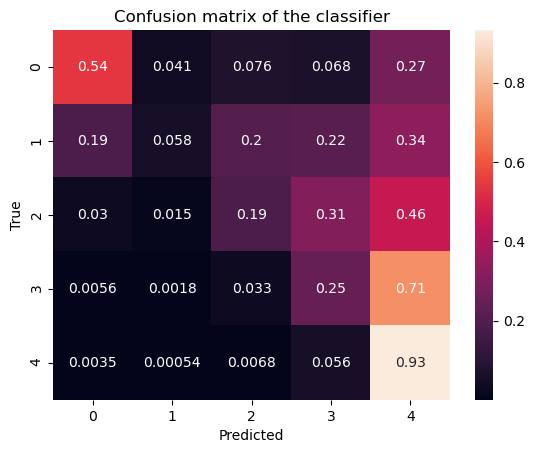

In [158]:
# pickle model - saves it so you can load it later
with open('ridgereg_model.obj', 'wb') as f:
        pickle.dump(model, f)
# to load pickled model: 
# with open('filename', 'rb') as f:
#    model = pickle.load(f)



# Evaluate your model on the testing set
Y_test_predictions = model.predict(X_test)
#print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(Y_test, Y_test_predictions))

accuracy = model.score(X_test, Y_test)
print("Accuracy:", accuracy)


# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Create the Kaggle submission

In [147]:
X_submission = pd.read_csv("./data/X_test.csv")


In [148]:
X_submission.columns

Index(['Id', 'ProductId', 'UserId', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Helpfulness',
       'ReviewLength', 'Product_Popularity', 'User_Popularity',
       '!_count_Summary', '?_count_Summary', '!_count_Text', '?_count_Text',
       'capital_freq_Summary', 'capital_freq_Text',
       'num_positive_words_Summary', 'num_negative_words_Summary',
       'num_positive_words_Text', 'num_negative_words_Text',
       'Summary_polarity', 'Summary_subjectivity', 'Text_polarity',
       'Text_subjectivity', 'Year', 'Summary_sent_score', 'Text_sent_score',
       'Score'],
      dtype='object')

In [149]:
X_submission.shape

(17470, 30)

In [150]:
#do the tfidf stuff here
#LOOK IF THE VECTOR SIZE OF TFIDF IS DIFFERENT

In [151]:
concat_lines_submission = prevectorizer(X_submission, "Text")

dt_matrix_submission = tfidf_vectorizer.transform(concat_lines_submission)


print("shape of df:", X_submission.shape)
print("shape of dt_matrix:", dt_matrix_submission.shape)

#comment this if you are using hstack method

columns_to_include=['HelpfulnessNumerator', 'HelpfulnessDenominator',
         'ReviewLength', 'Product_Popularity', 'User_Popularity',
       '!_count_Summary', '?_count_Summary', '!_count_Text', '?_count_Text',
       'capital_freq_Summary', 'capital_freq_Text',
       'num_positive_words_Summary', 'num_negative_words_Summary',
       'num_positive_words_Text', 'num_negative_words_Text',
       'Summary_polarity', 'Summary_subjectivity', 'Text_polarity',
       'Text_subjectivity', 'Year', 'Summary_sent_score', 'Text_sent_score']


if columns_to_include==[]:
    X_submission_new=dt_matrix_submission
else:
    X_submission_new = hstack([X_submission[columns_to_include], dt_matrix_submission])
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/canerozer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


shape of df: (17470, 30)
shape of dt_matrix: (17470, 271197)


In [96]:
#scaler = MaxAbsScaler() #because dt_matrix_train is a sparse matrix
#X_submission_new = scaler.fit_transform(X_submission_new)

In [152]:
X_submission_new=csr_matrix(X_submission_new)

In [49]:
#IGNORE THIS
#svd = TruncatedSVD(n_components=100) 
#X_submission_svd=svd.fit_transform(X_submission_new)


In [125]:
X_submission_new.shape

(17470, 271219)

In [68]:
#X_submission_processed = X_submission.drop(columns=['Id', 'ProductId', 'UserId', 'Text', 'Summary', 'Score','Time','HelpfulnessNumerator','HelpfulnessDenominator'])


In [153]:
X_submission['Score'] = model.predict(X_submission_new)

submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)